In [2]:
!pip3 install numpy

In [3]:
!pip3 install matplotlib

In [1]:
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy.signal import spectrogram

In [2]:
SAMPLE_RATE = 22050
DURATION = 5

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

In [3]:
x1, tone1 = generate_sine_wave(5000, SAMPLE_RATE, DURATION)


In [4]:
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(tone1)), ref=np.max)
print(freq.shape)

(1025, 216)


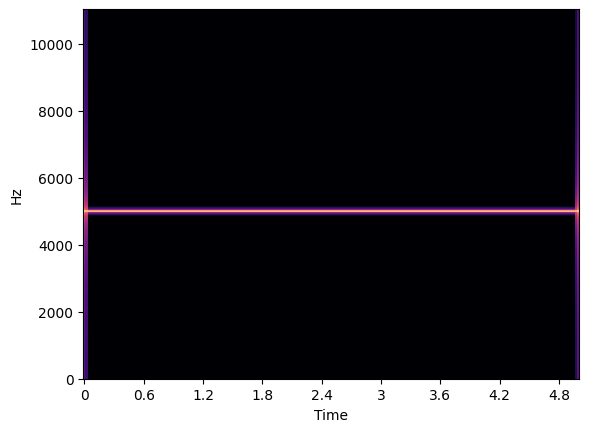

In [5]:
librosa.display.specshow(freq, y_axis='linear', x_axis='time')

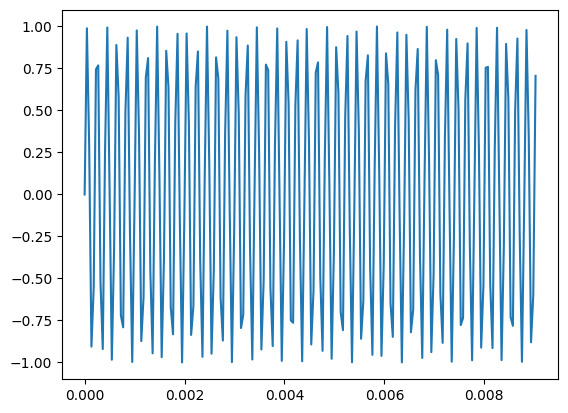

In [6]:
#showcasing that tone1 our y value is a sin wave
import matplotlib.pyplot as plt
plt.plot(x1[:200], tone1[:200])

In [8]:
#play audio
import sounddevice as sd
sd.play(tone1, SAMPLE_RATE)
sd.wait()

In [9]:
#save to a file
from scipy.io.wavfile import write
# Write it to a file
write("team2-sinetone.wav",SAMPLE_RATE,tone1)

In [10]:
#chirp signal
#time = x
def generate_chirp_signal(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    #divide by duration to make it a chirp signal
    frequencies = (x*freq)/duration
    # frequencies = freq
    print(frequencies.max())
    print(frequencies[-1])
    y = np.sin((np.pi)*frequencies*x)
    return x, y, frequencies

SAMPLE_RATE = 22050
DURATION = 5

x1, tone2, t_freq = generate_chirp_signal(8000, SAMPLE_RATE, 5)

7999.927437641723
7999.927437641723


(1025, 216)


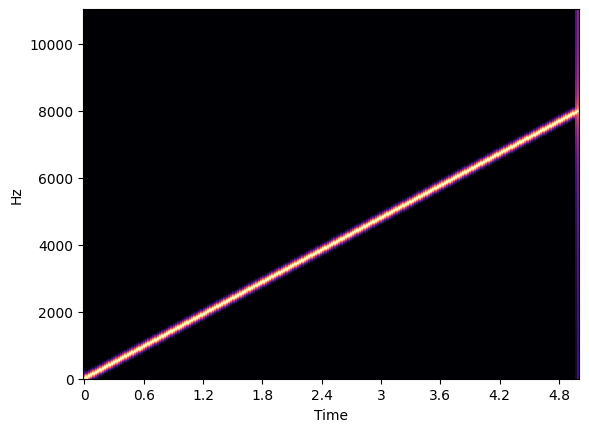

In [11]:
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(tone2)), ref=np.max)
# freq = np.abs(librosa.stft(tone2))
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time')

In [12]:
#play audio
import sounddevice as sd
sd.play(tone2, SAMPLE_RATE)
sd.wait()

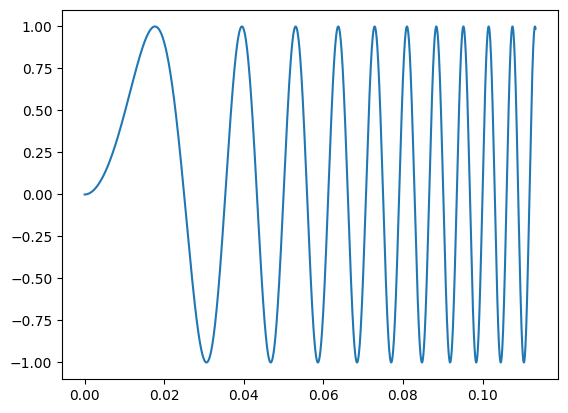

In [13]:
#showcasing that tone12 our y value is a sin wave and a chirp signal
import matplotlib.pyplot as plt
plt.plot(x1[:2500], tone2[:2500])

In [14]:
#save to a file tone2
from scipy.io.wavfile import write
# Write it to a file
write("team2-sinetone2.wav",SAMPLE_RATE,tone2)

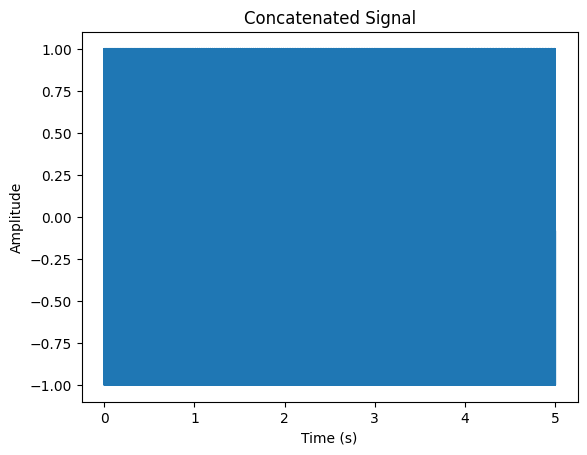

In [15]:
SAMPLE_RATE = 22050
DURATION = 5

def generate_sine_wave_CETK(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

#x=time
#creating individual sine waves
x1, tonecetk1 = generate_sine_wave(466, SAMPLE_RATE, 1)
x2, tonecetk2 = generate_sine_wave(524, SAMPLE_RATE, 1)
x3, tonecetk3 = generate_sine_wave(415, SAMPLE_RATE, 1)
x4, tonecetk4 = generate_sine_wave(207, SAMPLE_RATE, 1)
x5, tonecetk5 = generate_sine_wave(311, SAMPLE_RATE, 1)

#concatenate
cetk_concatenated = np.concatenate([x1, x2 + 1, x3 + 2, x4 + 3, x5 + 4])
nice_tone = np.concatenate([tonecetk1, tonecetk2, tonecetk3, tonecetk4, tonecetk5])

#plot is just for us
plt.plot(cetk_concatenated, nice_tone)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Concatenated Signal")
plt.show()

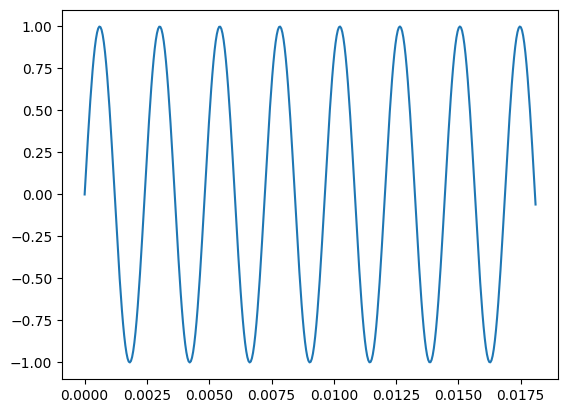

In [16]:
#testing frequencies of cetk signals
import matplotlib.pyplot as plt
plt.plot(x3[:400], tonecetk3[:400])

In [17]:
#play audio nice_tone
import sounddevice as sd
sd.play(nice_tone, SAMPLE_RATE)
sd.wait()

In [18]:
#save to a file cetk
from scipy.io.wavfile import write
# Write it to a file
write("team2-cetk.wav",SAMPLE_RATE,nice_tone)

(1025, 216)


(100.0, 700.0)

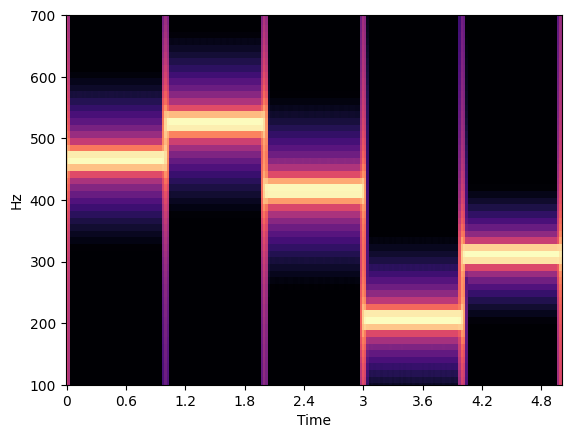

In [19]:
#spectrogram
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(nice_tone)), ref=np.max)
# freq = np.abs(librosa.stft(tone2))
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time')

# Limit the frequency range to 1000 Hz
plt.ylim([100, 700])

In [20]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd


In [91]:

#re recording
# Record duration in seconds
duration = 5
# Define Sampling Rate or Frequency in Hz
sr = 22050
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("team2-soundproj1.wav",sr,recording)
# Look at the discrete number array we got from the audio

recording...............


In [21]:
#loading the project 1 audio
toneproj1, sr = librosa.load('team2-soundproj1.wav',mono=False)
ipd.Audio(toneproj1, rate=sr)

In [22]:
#question 5
SAMPLE_RATE = 22050
DURATION = 5

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

x1_q5, tone1_q5 = generate_sine_wave(5000, SAMPLE_RATE, DURATION)
#_, tone4_q5 = generate_sine_wave(1200, SAMPLE_RATE, DURATION)
nice_tone_q5 = tone1_q5 + toneproj1
#nice_tone_q5 = tone4_q5 + tone1_q5



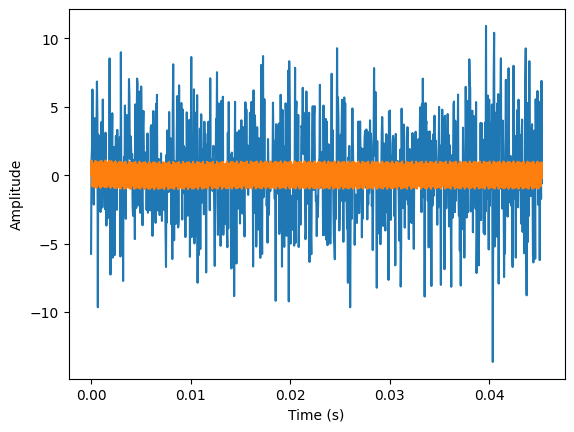

In [23]:
noise_tone_q5 = np.random.randn(tone1_q5.shape[0])
noise_tone_q5 = 3.5*noise_tone_q5
mixed_tone_q5 = nice_tone_q5 + noise_tone_q5

plt.plot(x1_q5[0:1000], mixed_tone_q5[0:1000])
plt.plot(x1_q5[0:1000],nice_tone_q5[0:1000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [25]:
#play audio
import sounddevice as sd
sd.play(nice_tone_q5, SAMPLE_RATE)
sd.wait()

In [26]:
#save to a file cetk
from scipy.io.wavfile import write
# Write it to a file
write("team2-speechchirp.wav",SAMPLE_RATE,nice_tone_q5)

(1025, 216)


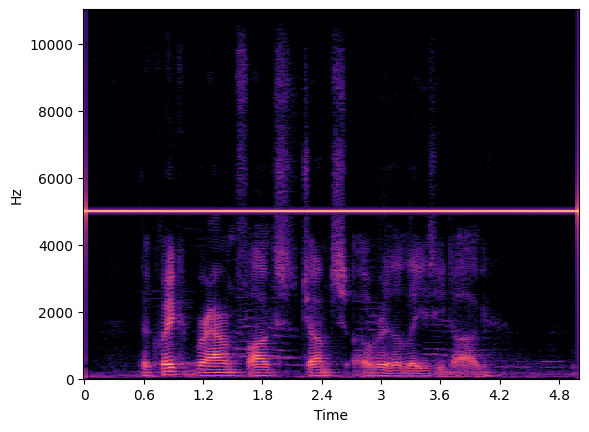

In [27]:
#spectrogram
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(nice_tone_q5)), ref=np.max)
# freq = np.abs(librosa.stft(tone2))
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time')

In [28]:
from numpy import cos, sin, pi, absolute, arange, zeros
from scipy.signal import hamming,firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
from scipy.signal import firwin, lfilter

In [3]:
'''from scipy.signal import firwin

#question 5
def lowpass(fc, Fs, N):
    FN = 2*fc    #Nyquist rate


N = eval(input('2'))
fc = eval(input('4000'))
Fs = eval(input('22050'))

# Use firwin with a Hamming window to create a lowpass FIR filter.
# taps = firwin(N, fc/Fs, window=('hamming'))
taps = firwin(N, fc/Fs, pass_zero=False, window=('hamming'))'''



In [29]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from pylab import clf
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, lfilter, freqz
from scipy.signal import butter,filtfilt

In [30]:
# Analog low pass butterworth filter
order = 2
SAMPLE_RATE = 22050
fc = 4000 # Hz, cut off frequency
nyq = SAMPLE_RATE/2
normal_cutoff = fc / nyq
# b = numerator coefficients, a = denominator coefficients
# w = frequency variable, h= frequency response
b, a = butter(order, normal_cutoff, btype='low', analog=False)
lowpass = filtfilt(b, a, nice_tone_q5)
print (lowpass.shape)
print(nice_tone_q5.shape)
print(lowpass)

(110250,)
(110250,)
[ 0.02938635  0.29105602  0.14568941 ...  0.3640105  -0.09352569
 -0.98675656]


(1025, 216)


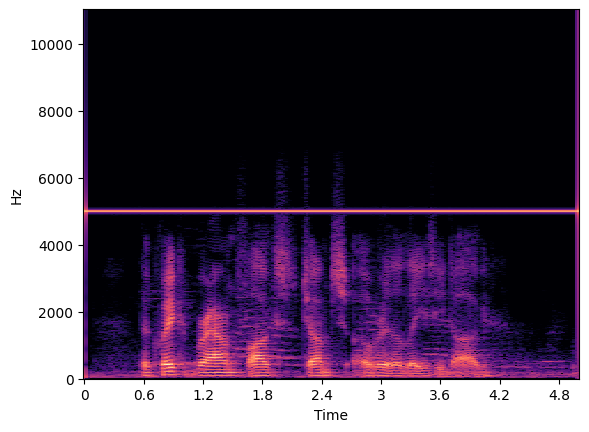

In [32]:
#spectrogram
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(lowpass)), ref=np.max)
# freq = np.abs(librosa.stft(tone2))
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time')